# Modeling 
This final phase of the NBA MVP Prediction Project will be concluded with modeling. In this notebook, we will recall the data from preprocessing that has been standardized and begin testing different parameters and models. Once the models have been selected, we will test each model for accuracy, recall, precision and F1 scores. Overall, the goal of the model is to predict the NBA MVP for any given season.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns',None)

#mpackages used for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor


The first step is to load in the dataframes created from the previous phases, this notebook will be focusing in on the final dataframes created in preprocessing

In [2]:
final_df = pd.read_csv('../data/final_df.csv')
testing_df = pd.read_csv('../data/testing_df.csv')

In [3]:
#Viewing the final_df dataframe
final_df.head()

,Unnamed: 0.1,Unnamed: 0,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,fg2_per_g,fg2a_per_g,fg2_pct,efg_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,max_award_share,award_share_0,award_share_1
0,0,0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,0.579,0.0,0.0,0.000,9.9,17.1,0.580,0.579,4.1,5.8,0.706,2.3,6.4,8.7,3.0,0.8,2.7,3.0,2.9,23.9,2677,23.4,0.608,0.002,0.340,7.3,19.1,13.4,11.9,1.1,4.1,13.3,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,0,1,0
1,1,1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,0.494,0.0,0.0,0.000,6.4,13.0,0.494,0.494,2.3,2.9,0.781,1.7,5.7,7.4,4.5,1.4,1.0,2.5,3.4,15.1,2393,18.6,0.529,0.001,0.227,6.6,20.2,13.6,22.1,2.3,1.9,14.8,22.8,2.5,4.7,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561,0,1,0
2,2,2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,0.465,0.5,1.4,0.352,7.0,14.7,0.475,0.480,3.3,4.8,0.680,1.7,3.1,4.9,3.2,0.7,0.4,2.6,3.0,18.7,1468,17.3,0.514,0.087,0.301,6.7,12.9,9.7,18.6,1.2,0.9,12.7,29.8,1.0,0.8,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341,0,1,0
3,3,3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,0.357,0.1,0.3,0.294,1.4,3.8,0.363,0.369,1.1,1.2,0.862,0.5,0.6,1.1,1.6,0.7,0.1,1.0,1.6,4.1,564,10.1,0.439,0.077,0.294,5.0,5.9,5.5,19.7,3.1,0.3,17.5,21.5,-0.3,0.8,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768,0,1,0
4,4,4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,0.472,0.1,0.2,0.375,4.4,9.4,0.475,0.477,3.5,4.6,0.747,0.4,1.3,1.7,8.0,0.8,0.0,2.6,1.9,12.6,2167,14.3,0.542,0.025,0.485,1.3,4.5,2.9,31.9,1.1,0.1,18.4,17.9,3.4,1.8,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768,0,1,0


Adding the season and player column back into the testing_df, it was dropped in the preprocessing phase but is needed to continue with modeling 

In [4]:
testing_df['season'] = final_df['season'].reindex(testing_df.index)

In [5]:
testing_df['player'] = final_df['player'].reindex(testing_df.index)

In [6]:
#Viewing the testing_df dataframe
testing_df.head()


,Unnamed: 0,fg_pct,blk_pct,usg_pct,fta_per_fga_pct,vorp,mov,mp,fg3_pct,tov_per_g,drb_per_g,mov_adj,drb_pct,tov_pct,max_award_share,award_share_0,award_share_1,season,player
0,0,0.579,4.1,25.6,0.340,4.7,4.87,2677,0.000,3.0,6.4,4.37,19.1,13.3,0,1,0,1982,Kareem Abdul-Jabbar
1,1,0.494,1.9,22.8,0.227,3.4,3.45,2393,0.000,2.5,5.7,3.05,20.2,14.8,0,1,0,1982,Alvan Adams
2,2,0.465,0.9,29.8,0.301,1.0,-4.43,1468,0.352,2.6,3.1,-4.48,12.9,12.7,0,1,0,1982,Mark Aguirre
3,3,0.357,0.3,21.5,0.294,-0.1,6.38,564,0.294,1.0,0.6,6.35,5.9,17.5,0,1,0,1982,Danny Ainge
4,4,0.472,0.1,17.9,0.485,1.1,6.38,2167,0.375,2.6,1.3,6.35,4.5,18.4,0,1,0,1982,Tiny Archibald


In [7]:
testing_df.isnull()

,Unnamed: 0,fg_pct,blk_pct,usg_pct,fta_per_fga_pct,vorp,mov,mp,fg3_pct,tov_per_g,drb_per_g,mov_adj,drb_pct,tov_pct,max_award_share,award_share_0,award_share_1,season,player
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17693,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17694,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17695,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Creating X and y variables
X = testing_df
y = testing_df['max_award_share']


In [9]:
le = LabelEncoder()
X['player_id'] = le.fit_transform(X['player'])
y = le.fit_transform(y)

In [10]:
X.drop(['player','Unnamed: 0','max_award_share','award_share_0','award_share_1'], axis=1, inplace=True)

In order to make the results more readable, we're going to add player names back into the dataframe, but first they must be converted to Numeric values for the models can still function

In [ ]:
#Converting player names to numeric IDs
#players = X['player'].unique()
#player_dict = {player: i for i, player in enumerate(players)}
#X['player_id'] = X['player'].apply(lambda x: player_dict[x])
#X.drop('player', axis=1, inplace=True)

We will check the X and y variables for any missing values, this dataset is expected to have missing values due to some statistical categories not being tracked in earlier seasons. We may want to consider applying the average method to those columns for future testing

In [11]:
print(f'X has missing values: {X.isnull().values.any()}')
print(f'y has missing values: {y.isnull().values.any()}')
print(f'X has infinite values: {np.isinf(X).values.any()}')
print(f'y has infinite values: {np.isinf(y).values.any()}')

X has missing values: True


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [12]:
X = X.fillna(value=0)

In [ ]:
#X = X.dropna().replace([np.inf, -np.inf], np.nan).dropna()
#y = y[X.index]

In [13]:
print(f'X has missing values: {X.isnull().values.any()}')
print(f'y has missing values: {y.isnull().values.any()}')
print(f'X has infinite values: {np.isinf(X).values.any()}')
print(f'y has infinite values: {np.isinf(y).values.any()}')

X has missing values: False


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [14]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [15]:
#Defining the models 
models = {'Decision Tree': DecisionTreeClassifier(),
          'Linear Regression': LinearRegression(),
          'XGBoost': XGBRegressor()
          }

In [16]:
#Initializing an empty list to store testing results
results = []

Fitting each model on the training and testing data, then the models will be evaluated and added to a dataframe to visualize the results

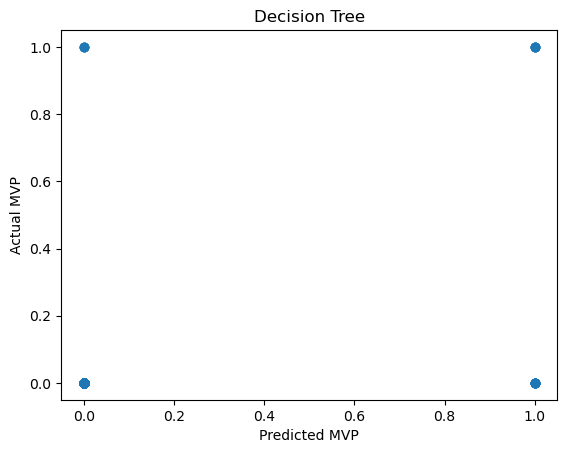

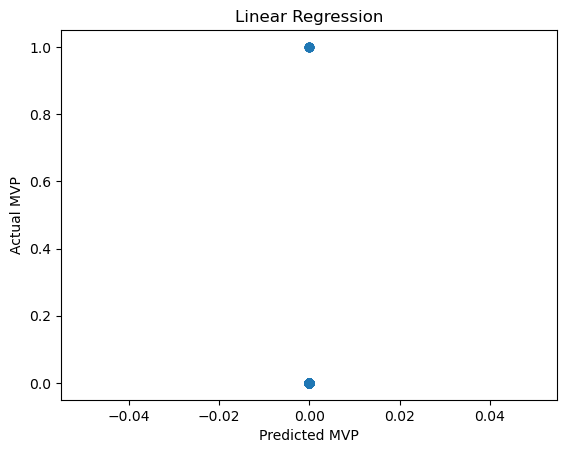

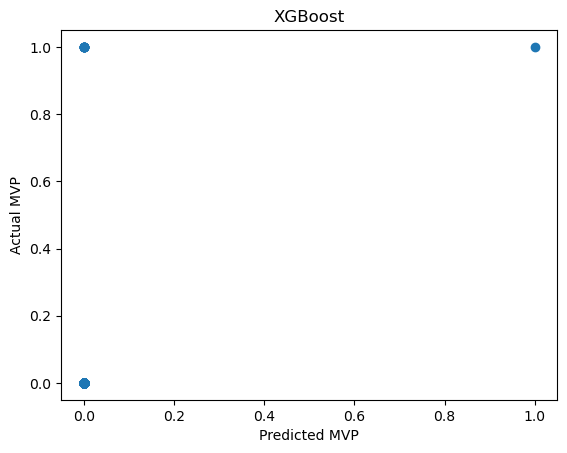

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Evaluating the performance metrics of each model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #Inverse transform of encoded player IDs back to player names
    predicted_mvp = le.inverse_transform(y_pred.astype(int))
    actual_mvp = le.inverse_transform(y_test.astype(int))

    #Convert player names back to encoded IDs
    predicted_mvp_id = le.transform(predicted_mvp)
    actual_mvp_id = le.transform(actual_mvp)

    #Creating a dataframe with the results of each model
    df = pd.DataFrame({
        'mean_squared_error': [mse] * len(y_test),
        'r2_score': [r2] * len(y_test),
        'season': X_test['season'].values,
        'predicted_mvp_id': predicted_mvp_id.flatten(),
        'actual_mvp_id': actual_mvp_id.flatten(),
        'predicted_mvp': predicted_mvp,
        'actual_mvp': actual_mvp
    })

    #Creating a column to indicate whether the model was correct or incorrect
    df['model_correct'] = (df['predicted_mvp_id'] == df['actual_mvp_id']).apply(lambda x: 'yes' if x else 'no')

    #Adding the model to the dataframe
    df['model'] = name

    #Appending the results to a list
    results.append(df)

    #Plotting the results for the model
    plt.scatter(df['predicted_mvp'], df['actual_mvp'])
    plt.xlabel('Predicted MVP')
    plt.ylabel('Actual MVP')
    plt.title(name)
    plt.show()

In [28]:
results_df = pd.concat(results, ignore_index=True)


In [29]:
print(results_df)

       mean_squared_error  r2_score  season  predicted_mvp_id  actual_mvp_id  \
0                0.002825 -0.669496    2006               0.0              0   
1                0.002825 -0.669496    2022               0.0              0   
2                0.002825 -0.669496    2003               0.0              0   
3                0.002825 -0.669496    1987               0.0              0   
4                0.002825 -0.669496    2013               0.0              0   
...                   ...       ...     ...               ...            ...   
47785            0.001929 -0.140137    2002               0.0              0   
47786            0.001929 -0.140137    2007               0.0              0   
47787            0.001929 -0.140137    1989               0.0              0   
47788            0.001929 -0.140137    2017               0.0              0   
47789            0.001929 -0.140137    2018               0.0              0   

       predicted_mvp  actual_mvp model_

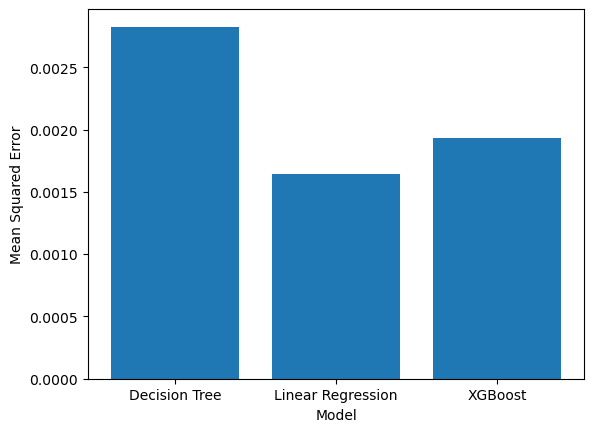

In [22]:
plt.bar(results_df['model'], results_df['mean_squared_error'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

ValueError: Could not interpret value `correct` for parameter `hue`

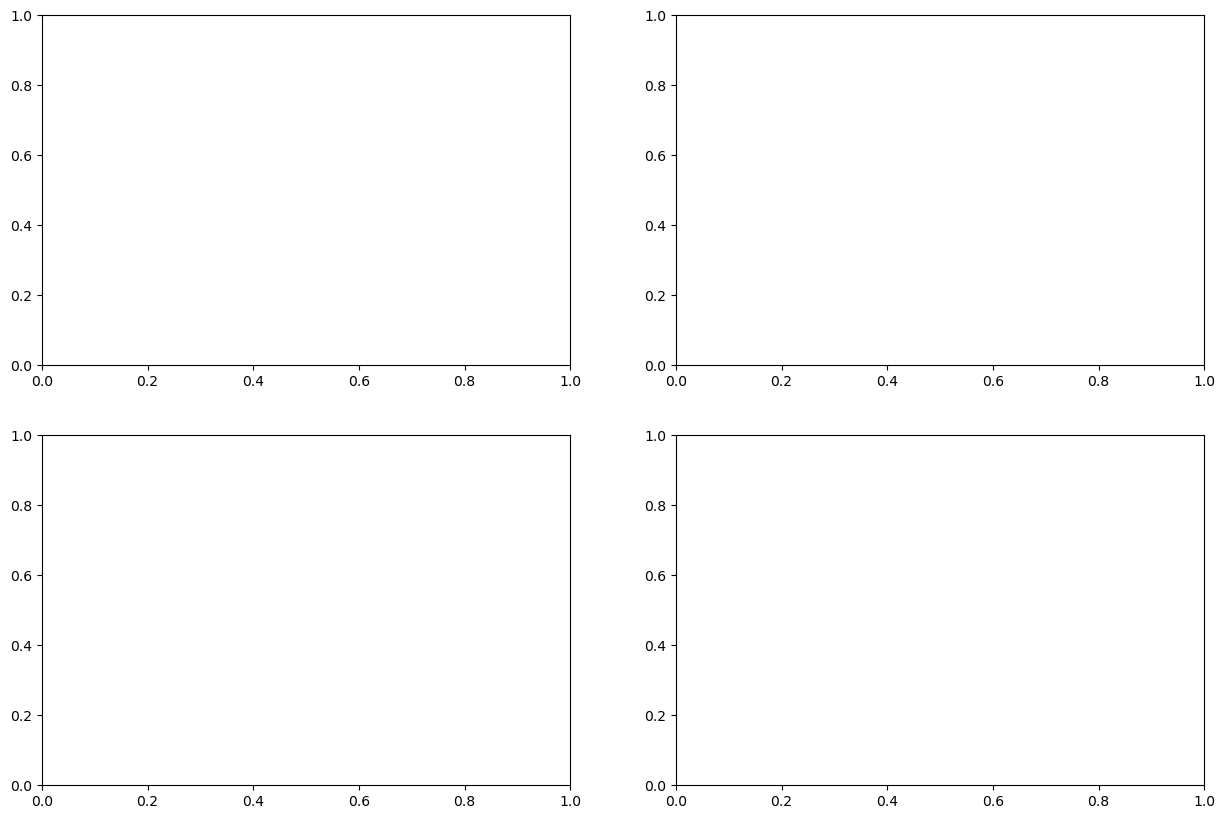

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.scatterplot(ax=axes[0,0], data=results_df, x='predicted_mvp', y='actual_mvp', hue='correct')
axes[0,0].set_xlabel('Predicted MVP')
axes[0,0].set_ylabel('Actual MVP')
axes[0,0].set_title('Predicted vs Actual MVP')

sns.boxplot(ax=axes[0,1], data=results_df, x='model', y='mean_squared_error')
axes[0,1].set_xlabel('Model')
axes[0,1].set_ylabel('Mean Squared Error')
axes[0,1].set_title('Mean Squared Error by Model')

sns.boxplot(ax=axes[1,0], data=results_df, x='model', y='r2_score')
axes[1,0].set_xlabel('Model')
axes[1,0].set_ylabel('R2 Score')
axes[1,0].set_title('R2 Score by Model')

sns.countplot(ax=axes[1,1], data=results_df, x='model_correct')
axes[1,1].set_xlabel('Prediction Correct')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Correct vs Incorrect Predictions')

plt.tight_layout()
plt.show()